In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
%matplotlib inline

In [2]:
class HeatEquation:    
    def __init__(self, alpha, X, T,
             initialCondition = lambda x: x * (1 - x), boundaryConditionL = lambda x: 0, boundaryConditionR = lambda x: 0):
        self.alpha = alpha
        self.ic = initialCondition
        self.bcl = boundaryConditionL
        self.bcr = boundaryConditionR
        self.X = X
        self.T = T

In [3]:
class ExplicitEulerScheme:    
    def __init__(self, M, N, equation):
        self.eq = equation
        self.dt = self.eq.T / M
        self.dx = self.eq.X / N
        self.T = np.zeros((N + 1, M + 1))
        self.xArray = np.linspace(0, self.eq.X, N + 1)
        self.T[:, 0] = self.eq.ic(self.xArray)
        self.r = self.eq.alpha * self.dt / self.dx / self.dx
        self.M = M
        self.N = N
    def roll_back(self):
        for n in range(0, self.M):
            for i in range(1, self.N):
                self.T[i][n + 1] = self.r * self.T[i - 1][n] + (1 - 2 * self.r) * self.T[i][n] + self.r * self.T[i + 1][n]
        self.T[0][n + 1] = self.eq.bcl(self.xArray[0])
        self.T[self.N][n + 1] = self.eq.bcr(self.xArray[-1])   
    def mesh_grids(self):
        tArray = np.linspace(0, self.eq.T, self.M + 1)
        tGrids, xGrids = np.meshgrid(tArray, self.xArray)
        return tGrids, xGrids   

In [4]:
ht = HeatEquation(1., 1., 1.)
scheme = ExplicitEulerScheme(2500, 25, ht)
scheme.roll_back()

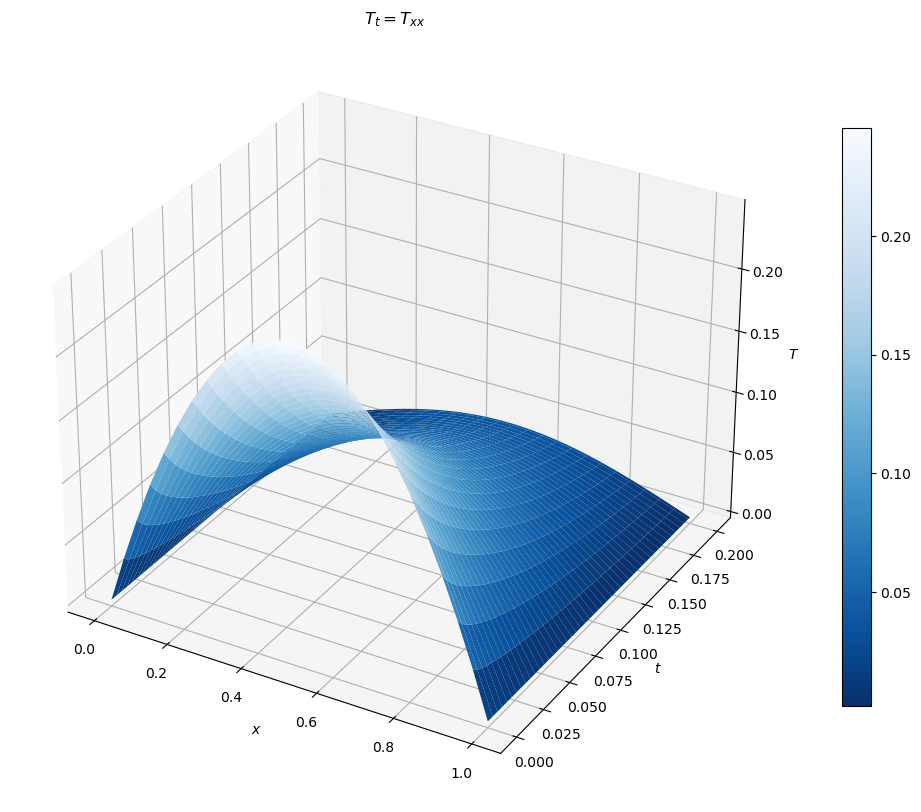

In [5]:
tGrids, xGrids = scheme.mesh_grids()
fig= plt.figure(figsize = (16,10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
cutoff = int(0.2 / scheme.dt) + 1
surface = ax.plot_surface(xGrids[:, :cutoff], tGrids[:, :cutoff], scheme.T[:, :cutoff], cmap = plt.cm.Blues_r)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_zlabel("$T$")
ax.set_title("$T_{t} = T_{xx}$")
fig.colorbar(surface,shrink=0.75)